In [ ]:
# Machine Learning - HW1
# @ Raha Amirian
# Professor Armin Mehrabian & Sardar Hamidian

# Machine Learning Classification by creating a KNN classifier
# Programming Language: Python
# PIMA = explores the prevelance of diabetes in a native american tribe.

In [92]:
# KNN Algorithm 
# Evaluate the performance 
# Actual ”wall-clock” time
# Optimum K


# in order to share the actual ”wall-clock” time that it took to compute your results.
import time
start_time = time.time()

import pandas as pd
import numpy as np

# Load the dataset into a Pandas dataframe
diabetes_data = pd.read_csv('diabetes.csv')

# Separate the features (X) and labels (y)
X = diabetes_data.iloc[:, :-1].values # ignore first data column
# diabet positive or negative
y = diabetes_data.iloc[:, -1].values # ignore first data column

# Normalize the features using the min-max scaling
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Shuffle the data
np.random.seed(0)
shuffle_indices = np.random.permutation(len(X))
X = X[shuffle_indices]
y = y[shuffle_indices]

# Split the data into training and testing sets
split_ratio = 0.7  # 70% training, 30% testing
split_index = int(len(X) * split_ratio)

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]



class KNNClassifier:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Compute the distances between the test point and all training points
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            #print ("distance is: " ,distances)
            # Find the indices of the k nearest neighbors
            indices = np.argsort(distances)[:self.k]
            #print ("indice is: " ,indices)
            # Get the labels of the k nearest neighbors
            k_nearest_labels = self.y_train[indices]
            # Assign the most common label to the test point
            y_pred.append(np.bincount(k_nearest_labels).argmax())
        return np.array(y_pred)
    
# Finding the optimized K
k_scores = []  # assume the first number is the maximum  
for Q in range(1,50):
    knn = KNNClassifier(Q)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)

    accuracy = np.mean(predictions == y_test)

    k_scores.append(accuracy)
    
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for i in range(len(y_test)):
        if y_test[i] == 1 and predictions[i] == 1:
            tp += 1
        elif y_test[i] == 0 and predictions[i] == 1:
            fp += 1
        elif y_test[i] == 0 and predictions[i] == 0:
            tn += 1
        elif y_test[i] == 1 and predictions[i] == 0:
            fn += 1


print("The highest accurecy is :",np.max(k_scores))
highest_index = k_scores.index(max(k_scores))
print("Optimal K value = ",highest_index+1) # to reach the right index of the list
# to have space in result
print()
print("True positives:", tp)
print("False positives:", fp)
print("True negatives:", tn)
print("False negatives:", fn)
# to have space in result
print()
end_time = time.time()
print("Wall Clock Time: {:.2f} seconds".format(end_time - start_time))




The highest accurecy is : 0.7575757575757576
Optimal K value =  45

True positives: 28
False positives: 11
True negatives: 143
False negatives: 49

Wall Clock Time: 0.53 seconds


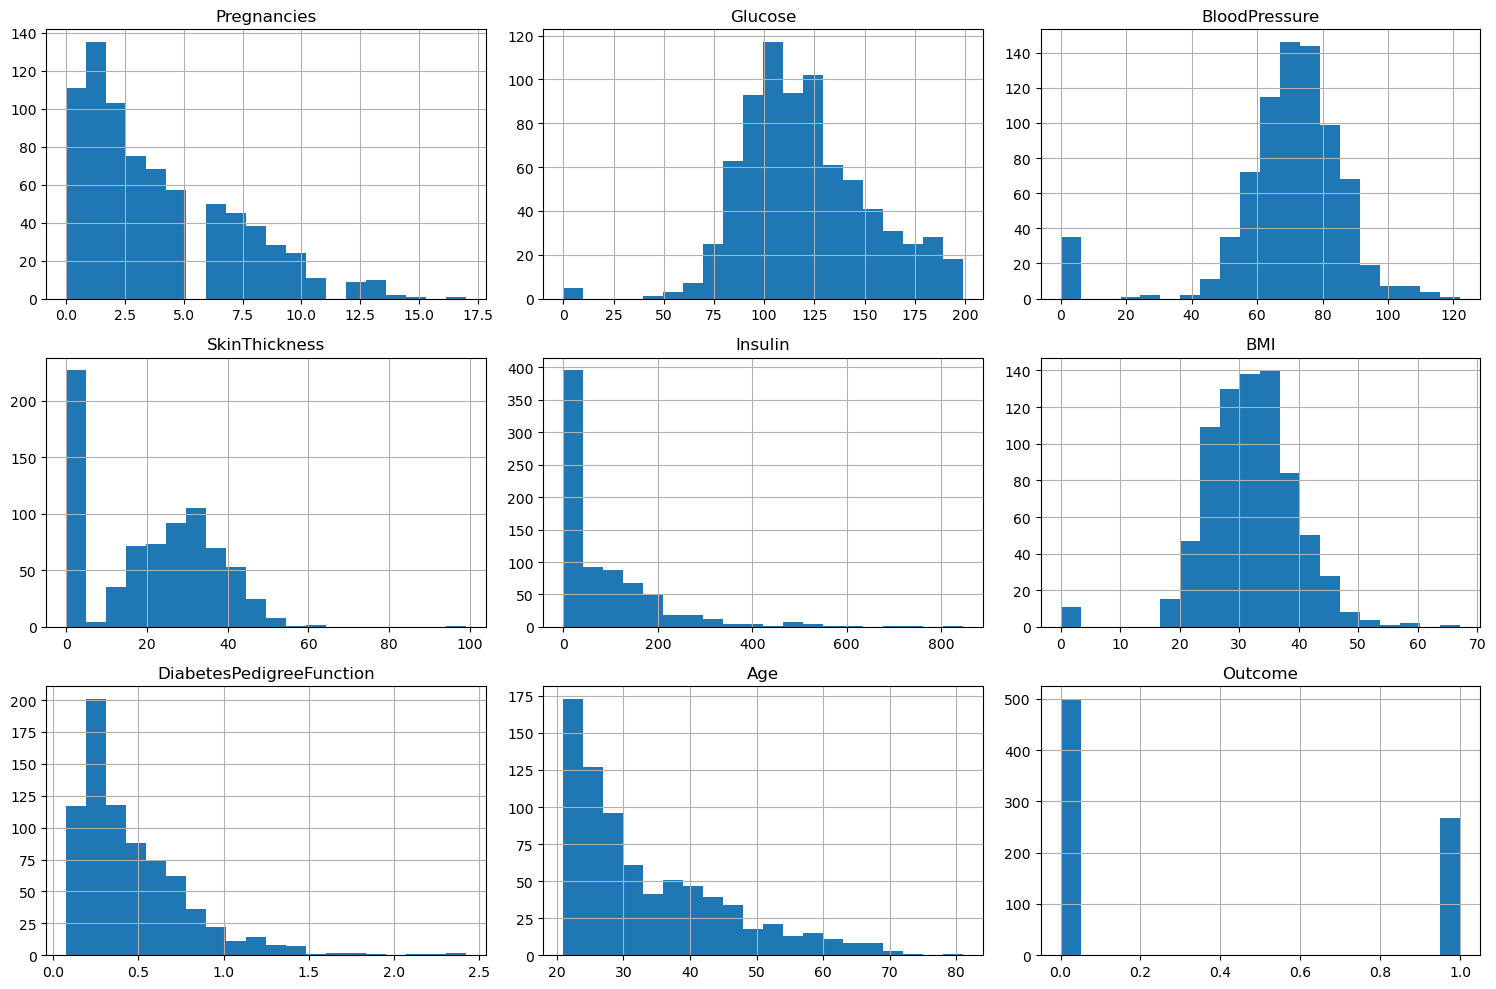

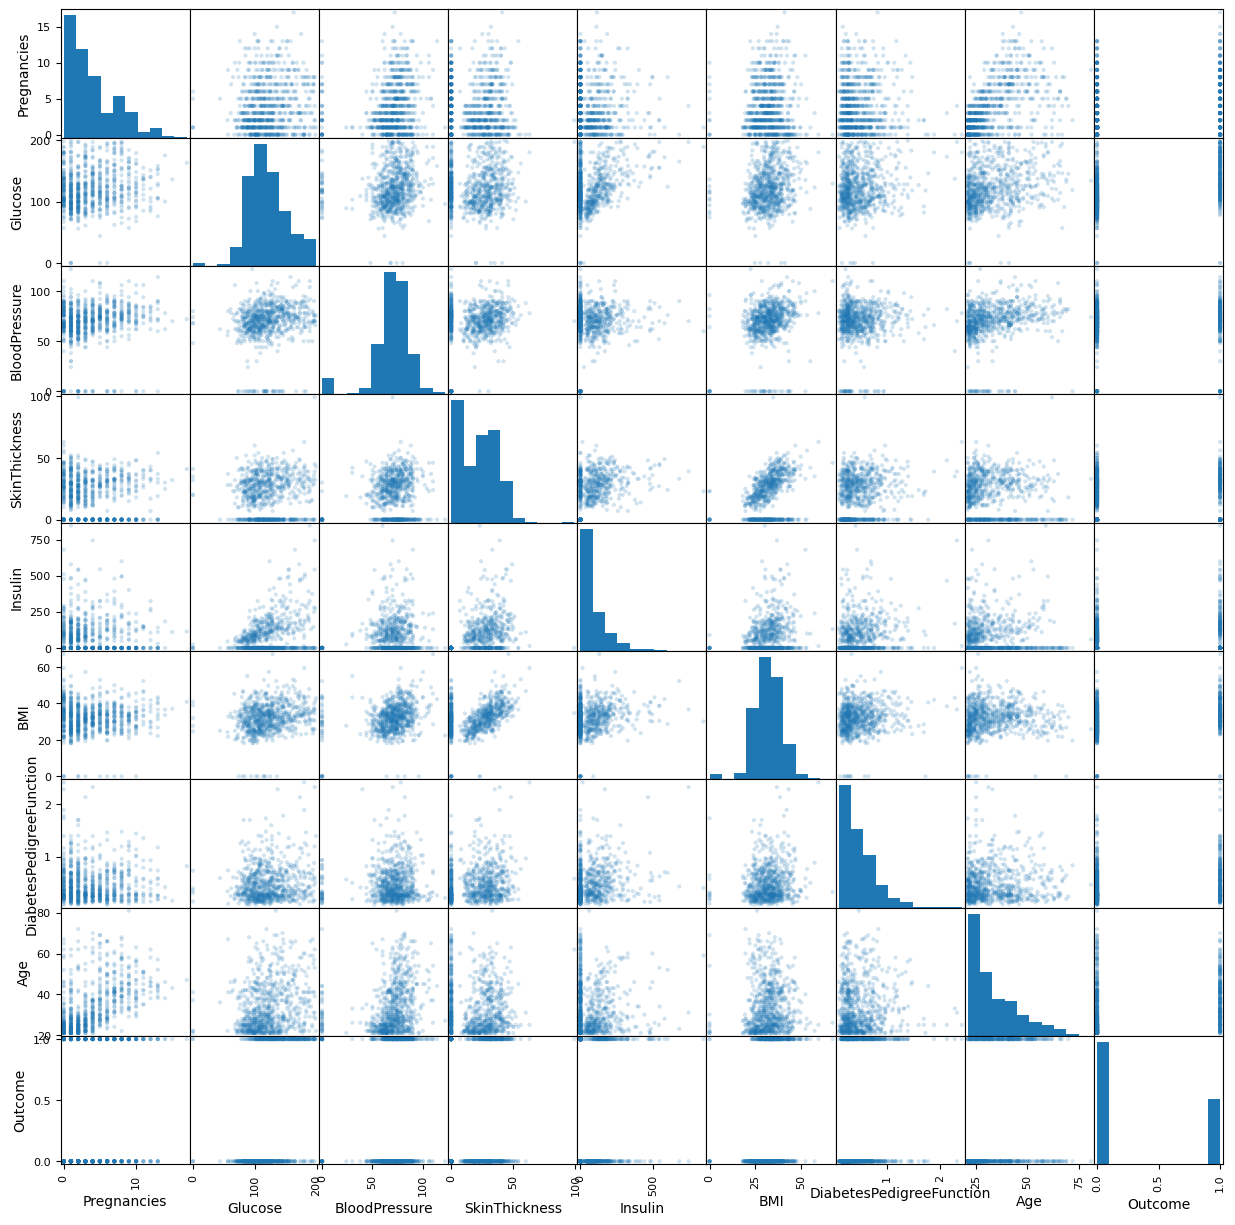

In [87]:
# Visualization 


import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Create histograms of each feature
df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

# Create scatter plots of pairs of features
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='hist')
plt.show()

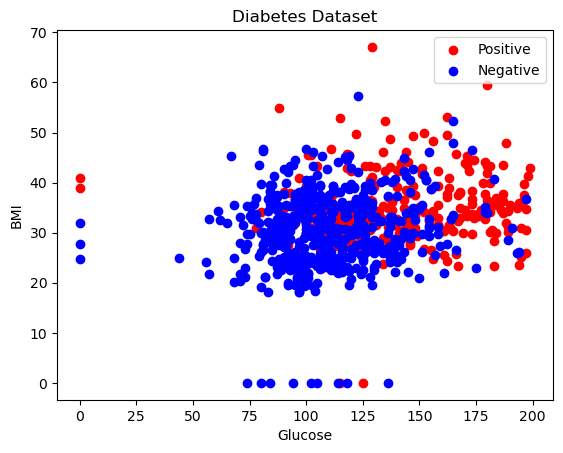

In [88]:
# Visualization


import matplotlib.pyplot as plt

# Separate the data into positive and negative examples
positive = diabetes_data[diabetes_data['Outcome'] == 1]
negative = diabetes_data[diabetes_data['Outcome'] == 0]

# Create a scatter plot of the data
plt.scatter(positive['Glucose'], positive['BMI'], c='red', label='Positive')
plt.scatter(negative['Glucose'], negative['BMI'], c='blue', label='Negative')

# Add labels and title to the plot
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Diabetes Dataset')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()



In [86]:
# use three different distance metrics and compare the results.


import time
import pandas as pd
import numpy as np

# Load the dataset into a Pandas dataframe
diabetes_data = pd.read_csv('diabetes.csv')

# Separate the features (X) and labels (y)
X = diabetes_data.iloc[:, :-1].values
y = diabetes_data.iloc[:, -1].values

# Normalize the features using the min-max scaling
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Shuffle the data
np.random.seed(0)
shuffle_indices = np.random.permutation(len(X))
X = X[shuffle_indices]
y = y[shuffle_indices]

# Split the data into training and testing sets
split_ratio = 0.7
split_index = int(len(X) * split_ratio)
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

# Define the KNNClassifier class
class KNNClassifier:
    def __init__(self, k, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Compute the distances between the test point and all training points
            if self.distance_metric == 'manhattan':
                distances = np.sum(np.abs(self.X_train - x), axis=1)
            elif self.distance_metric == 'minkowski':
                distances = np.power(np.sum(np.power(np.abs(self.X_train - x), 3), axis=1), 1/3)
            else:  # euclidean distance metric by default
                distances = np.sqrt(np.sum(np.power(self.X_train - x, 2), axis=1))
            # Find the indices of the k nearest neighbors
            indices = np.argsort(distances)[:self.k]
            # Get the labels of the k nearest neighbors
            k_nearest_labels = self.y_train[indices]
            # Assign the most common label to the test point
            y_pred.append(np.bincount(k_nearest_labels).argmax())
        return np.array(y_pred)

# Test the performance of KNNClassifier with different distance metrics
distance_metrics = ['manhattan', 'minkowski', 'euclidean']
for distance_metric in distance_metrics:
    print(f"\nTesting with {distance_metric} distance metric:")
    k_scores = []
    for k in range(1, 50):
        knn = KNNClassifier(k, distance_metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        k_scores.append(accuracy)
    optimal_k = np.argmax(k_scores) + 1
    print(f"Highest accuracy: {np.max(k_scores)}")
    print(f"Optimal k value: {optimal_k}")




Testing with manhattan distance metric:
Highest accuracy: 0.7445887445887446
Optimal k value: 5

Testing with minkowski distance metric:
Highest accuracy: 0.7445887445887446
Optimal k value: 47

Testing with euclidean distance metric:
Highest accuracy: 0.7575757575757576
Optimal k value: 45


In [ ]:
# Describe the DATA:
# Pima Indians Diabetes Database  
# medical information about 768 female Pima Indians aged 21 and above, 
# including their age, number of pregnancies, body mass index (BMI), blood pressure, insulin level, glucose level, and diabetes status
# diabetes status is "0" for non-diabetic & "1" for diabetic

In [ ]:
# Preprocessing and feature scaling techniques:
# Before applying the KNN algorithm, some preprocessing and feature scaling techniques were applied.
# Included removing any missing values and separating the dataset into features (X) and labels (y). 
# Then, the min-max scaling technique was used to normalize the features in order to have them on the same scale.
# In addition, the distance metric used in the K-NN algorithm was the Euclidean distance. 
# Find the k nearest neighbors.
# Ensuring that the data is properly scaled and the distances between the data points are computed accurately.